![title](./assets/str_word.png)
![title](./assets/str_pic.png)

In [106]:
import numpy as np
import pandas as pd
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
df_anime = pd.read_csv('./assets/anime_filtered.csv')
df_users = pd.read_csv('./assets/users_filtered.csv')

In [107]:
print(df_anime.columns)

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')


In [108]:
print(df_users.columns)

Index(['username', 'user_id', 'user_watching', 'user_completed', 'user_onhold',
       'user_dropped', 'user_plantowatch', 'user_days_spent_watching',
       'gender', 'location', 'birth_date', 'access_rank', 'join_date',
       'last_online', 'stats_mean_score', 'stats_rewatched', 'stats_episodes'],
      dtype='object')


In [109]:
anime_premiered = df_anime[df_anime.premiered.notnull()].premiered
release_seasons = []

for i in anime_premiered.index:
    release_seasons.append(anime_premiered[i].split(" ")[0])

apc = pd.Series(release_seasons).value_counts()   
anime_premiered_count = pd.DataFrame({'season':apc.index, 'premier':apc.values, 'order':[1,3,4,2]})
anime_premiered_count.set_index('order', inplace=True)
anime_premiered_count.sort_index(inplace=True)

In [110]:
anime_premiered_count

,season,premier
order,,
1,Spring,1420
2,Summer,683
3,Fall,1211
4,Winter,782


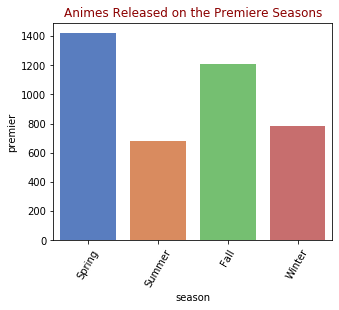

In [111]:
plt.figure(figsize=(5,4))
sns.barplot(x='season',y='premier', data=anime_premiered_count, palette="muted")
plt.xticks(rotation=60)
plt.title('Animes Released on the Premiere Seasons',color = 'darkred',fontsize=12)
plt.show()

In [112]:
anime_premiered = df_anime[df_anime.premiered.notnull()].premiered
premier_seasons = []
premier_years = []


for i in anime_premiered.index:
    if(2009 <= int(anime_premiered[i].split(" ")[1]) <= 2018):
        premier_seasons.append(anime_premiered[i].split(" ")[0])
        premier_years.append(anime_premiered[i].split(" ")[1])
        
premier_df = pd.DataFrame({
                            'Year':premier_years,
                            'Spring': [1 if each == 'Spring' else 0 for each in premier_seasons],
                            'Summer': [1 if each == 'Summer' else 0 for each in premier_seasons],
                            'Fall':   [1 if each == 'Fall'   else 0 for each in premier_seasons],
                            'Winter': [1 if each == 'Winter' else 0 for each in premier_seasons],
                            })

premier_years_seasons = premier_df.groupby(['Year'])['Spring','Summer','Fall','Winter'].agg('sum')

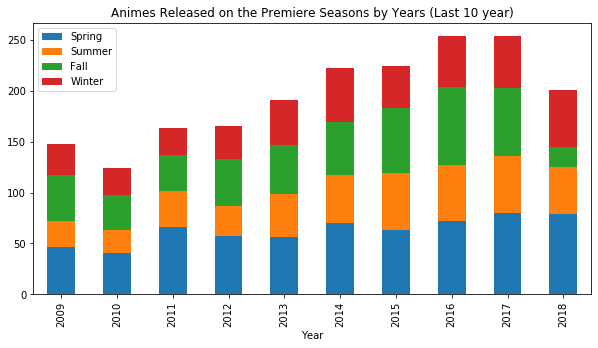

In [113]:
premier_years_seasons.plot(kind='bar',stacked=True, figsize=(10,5), title='Animes Released on the Premiere Seasons by Years (Last 10 year)')
plt.show()

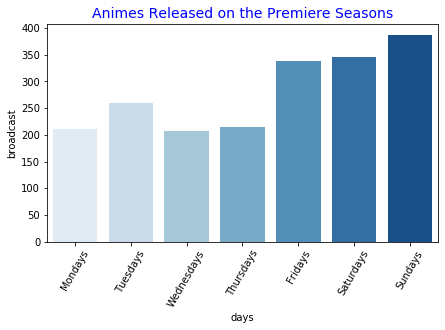

In [114]:
broadcast = [x.split(" at ")[0].strip() for x in df_anime["broadcast"].astype("str")]
broad_days = pd.Series(broadcast).value_counts()[2:9]
df_broad_days = pd.DataFrame({'days':broad_days.index, 'broadcast':broad_days.values, 'index':[7,6,5,2,4,1,3]}).set_index('index').sort_index()

plt.figure(figsize=(7,4))
sns.barplot(x='days',y='broadcast', data=df_broad_days, palette="Blues")
plt.xticks(rotation=60)
plt.title('Animes Released on the Premiere Seasons',color = 'Blue',fontsize=14)
plt.show()

In [115]:
animetypes = df_anime['type'].value_counts(dropna=False)

In [116]:
print(animetypes)

TV         4271
OVA        3608
Movie      2624
Special    1948
ONA        1144
Music       849
Unknown      30
Name: type, dtype: int64


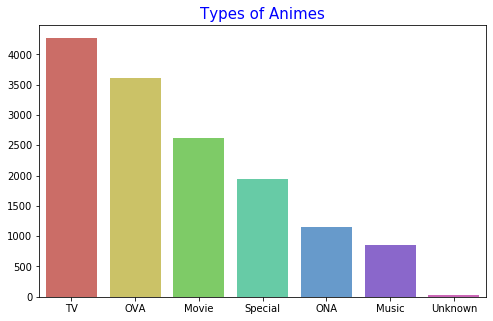

In [117]:
plt.figure(figsize=(8,5))
sns.barplot(x=animetypes.index,y=animetypes.values, palette="hls")
plt.title('Types of Animes',color = 'Blue',fontsize=15)
plt.show()

In [118]:
animesources= df_anime['source'].value_counts(dropna=False)
animesources = animesources[animesources.index != 'Unknown']

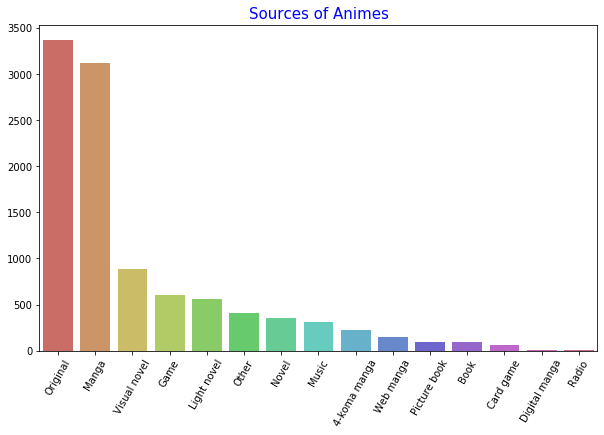

In [119]:
plt.figure(figsize=(10,6))
sns.barplot(x=animesources.index,y=animesources.values, palette="hls")
plt.xticks(rotation=60)
plt.title('Sources of Animes',color = 'Blue',fontsize=15)
plt.show()

In [120]:
anime_movies = df_anime[(df_anime.type == "Movie") & (df_anime.aired_string != "Not available")]
anime_movies["year"] = [x.split(",")[1].strip()[0:4] if len(x.split(",")) > 1 else x.split(",")[0].strip()[0:4] for x in anime_movies["aired_string"]]
anime_movies = anime_movies["year"].value_counts()
anime_movies_years = pd.DataFrame({'Year':anime_movies.index, 'Movie Count':anime_movies.values})
anime_movies_years = anime_movies_years.sort_values("Year")
anime_movies_years = anime_movies_years.iloc[:-2,:]
  

In [121]:
fig = px.line(anime_movies_years, x="Year", y="Movie Count", 
    title='Anime Movies by Years', width=750, height=400)
fig.show()

![title](./assets/country_list.png)

In [122]:
location = [x.split(",")[1].strip() if len(x.split(",")) > 1 else x.split(",")[0].strip() for x in df_users["location"].astype("str")]

In [123]:
pd.Series(location).value_counts()[:5] 

Poland        3755
California    2947
Germany       2250
Canada        2223
Brazil        2071
dtype: int64

In [124]:
location = ["USA" if x in ("USA", "United States of America", "U.S.A.", "US", "U.S.", "U.S.A", 
                           "usa", "United States", "California", "Texas", "New York", "Florida", 
                           "Ohio", "Michigan", "Illinois", "Washington", "Pennsylvania", "Virginia", 
                           "Arizona", "Maryland", "Tennessee",  "New Jersey", "North Carolina", 
                           "Colorado", "Oregon", "Indiana", "Massachusetts", "Minnesota", "NY", "CA", 
                           "TX", "FL", "PA", "IL", "MA", "NC", "NJ", "AZ", "GA", "VA", "IN","TN", 
                           "MI", "SC", "MN", "NYC", "MD", "MO", "WI", "Tx", "CT", "NV", "OR", "KY", 
                           "OH", "Ca", "CO", "LA", "DC", "AL", "ny", "NH", "Philadelphia", "north carolina", 
                           "Missouri", "Nevada", "Kentucky", "Louisiana", "Connecticut", "california", 
                           "Oklahoma", "Alabama", "Hawaii", "Kansas", "Utah", "Iowa", "South Carolina", 
                           "Arkansas", "Nebraska", "texas", "Southern California", "New England", 
                           "Mississippi", "florida", "new york", "Idaho", "New Mexico", "Chicago", 
                           "New Hampshire", "Los Angeles", "Rhode Island", "New York City", "Maine", 
                           "America", "Alaska", "Delaware", "Northern Ireland", "ohio", "Seattle", 
                           "West Virginia", "North Dakota", "South Dakota", "Boston", "Vermont", "Montana", 
                           "michigan", "washington", "New york", "Las Vegas", "Wisconsin", "Georgia" , "georgia" ,
                           "Washington State", "SoCal")  else x for x in location]
location = ["UK" if x in ("England", "england", "United Kingdom", "Scotland", "Glasgow", "London", "london", 
                          "Wales", "Manchester", "Nottingham", "Kent", "England.", "united kingdom", "Essex", 
                          "UK", "Uk", "uk", "Britain", "Liverpool", "Birmingham") else x for x in location]
location = ["Netherlands" if x in ("Netherlands", "The Netherlands", "Nederland", "Netherland", "the Netherlands", 
                                   "The netherlands", "netherlands", "Holland", "Amsterdam", "Utrecht", "Rotterdam", 
                                   "Limburg", "the netherlands", "Zuid-Holland") else x for x in location]
location = ["Canada" if x in ("Canada", "canada", "CANADA", "Ontario", "ON", "Quebec", "Québec", "Alberta", 
                              "Toronto", "Vancouver", "British Columbia", "Saskatchewan", "ontario", "BC", 
                              "Montreal", "Manitoba", "Nova Scotia") else x for x in location]
location = ["Brazil" if x in ("Brazil", "Brasil", "São Paulo", "Sao Paulo", "São Paulo - Brazil", "Paraná", 
                              "Pará", "Rio de Janeiro", "RJ", "RS", "SP", "MG", "DF", "Porto Alegre", 
                              "Minas Gerais", "brasil", "Brasil.", "Rio Grande do Sul", "Santa Catarina", 
                              "Bahia", "Ceará", "Pernambuco", "Brazil.", "brazil", 
                              "Goiás") else x for x in location]
location = ["Russia" if x in ("Russia", "Moscow", "Russian Federation", "Saint-Petersburg", "St. Petersburg", 
                              "Saint Petersburg", "Novosibirsk", "Россия", 
                              "St.Petersburg") else x for x in location]
location = ["Japan" if x in ("Japan", "japan", "Tokyo", "tokyo", "Ikebukuro", "Kyoto", 
                             "Osaka") else x for x in location]
location = ["Turkey" if x in ("Turkey", "Istanbul", "İstanbul", "istanbul", "Ankara", "Bursa", "Türkiye", 
                              "Turkiye", "turkey", 
                              "İzmir", "Izmir", "Antalya", "TURKEY") else x for x in location]
location = ["Philippines" if x in ("Philippines", "philippines", "Manila", "Cavite", "Phillipines", 
                                   "Metro Manila", "manila", "Cebu", "Laguna", 
                                   "Quezon City") else x for x in location]
location = ["Indonesia" if x in ("Indonesia", "Jakarta", "indonesia", "Bandung", "West Java", "Central Java", 
                                 "jakarta", "Jawa Timur", "Banten", "Jawa Barat", "East Java", "Indonesian", 
                                 "Yogyakarta") else x for x in location]
location = ["Spain" if x in ("Spain", "España", "Barcelona", "Madrid", "Valencia", 
                             "Catalonia") else x for x in location]
location = ["Poland" if x in ("Poland", "poland", "Warsaw", "Warszawa", "Poznań", "Łódź", "Gdańsk", "Wrocław", 
                              "Kraków", "Cracow", "Szczecin", "Gdynia", "Bydgoszcz", "Lublin", "Białystok", 
                              "Katowice", "Rzeszów", "Lodz") else x for x in location]
location = ["France" if x in ("France", "Paris", "france", "paris", "FRANCE") else x for x in location]
location = ["Australia" if x in ("Australia", "australia", "Sydney", "Melbourne", "Victoria", "WA", "NSW",
                                 "Western Australia", "New South Wales", "Adelaide", "Queensland", "Perth",
                                 "South Australia", "Brisbane") else x for x in location]
location = ["Portugal" if x in ("Portugal", "Lisbon", "Porto", "Lisboa", "portugal") else x for x in location]
location = ["Italy" if x in ("Italy", "Italia", "italy", "Rome", "Roma", "italia") else x for x in location]
location = ["Mexico" if x in ("Mexico", "México", "Mexico City", "mexico", "Baja California", 
                              "Jalisco") else x for x in location]
location = ["Argentina" if x in ("Argentina", "Buenos Aires") else x for x in location]
location = ["Greece" if x in ("Greece", "Athens", "greece", "athens") else x for x in location]
location = ["Hungary" if x in ("Hungary", "Budapest") else x for x in location]
location = ["India" if x in ("India", "india", "INDIA", "Mumbai") else x for x in location]
location = ["Sweden" if x in ("Sweden", "sweden", "Stockholm", "Gothenburg") else x for x in location]
location = ["Latvia" if x in ("Latvia", "Riga") else x for x in location]
location = ["Germany" if x in ("Germany", "Berlin", "Deutschland", "NRW", "Hamburg", "germany", 
                               "Bavaria", "Hessen") else x for x in location]
location = ["Malaysia" if x in ("Malaysia", "malaysia", "Kuala Lumpur", "Selangor", 
                                "Sarawak") else x for x in location]
location = ["Bulgaria" if x in ("Bulgaria", "Sofia") else x for x in location]
location = ["Singapore" if x in ("Singapore", "singapore") else x for x in location]
location = ["Romania" if x in ("Romania", "Bucharest") else x for x in location]
location = ["Austria" if x in ("Austria", "Vienna") else x for x in location]
location = ["Israel" if x in ("Israel", "israel") else x for x in location]
location = ["Lithuania" if x in ("Lithuania", "Vilnius", "Kaunas") else x for x in location]
location = ["Czech Republic" if x in ("Czech Republic", "Czech republic", "Prague") else x for x in location]
location = ["Estonia" if x in ("Estonia", "Tallinn") else x for x in location]
location = ["Ukraine" if x in ("Ukraine", "Kiev", "Odessa") else x for x in location]
location = ["Norway" if x in ("Norway", "Oslo", "norway") else x for x in location]
location = ["Colombia" if x in ("Colombia", "Cali") else x for x in location]
location = ["New Zealand" if x in ("New Zealand", "Auckland", "NZ") else x for x in location]
location = ["Finland" if x in ("New Zealand", "Helsinki") else x for x in location]
location = ["Belgium" if x in ("Belgium", "belgium", "Antwerp") else x for x in location]
location = ["China" if x in ("China", "Hong Kong") else x for x in location]
location = ["Vietnam" if x in ("Vietnam", "Viet Nam") else x for x in location]
location = ["Peru" if x in ("Peru", "Perú", "Lima") else x for x in location]
location = ["Saudi Arabia" if x in ("Saudi Arabia", "Riyadh", "KSA", "K.S.A", "Jeddah", "saudi arabia", 
                                    "jeddah") else x for x in location]
location = ["Kuwait" if x in ("Kuwait", "kuwait") else x for x in location]
location = ["Thailand" if x in ("Thailand", "Bangkok") else x for x in location]
location = ["Bangladesh" if x in ("Bangladesh", "Dhaka", "bangladesh") else x for x in location]
location = ["United Arab Emirates" if x in ("UAE", "Dubai") else x for x in location]
location = ["Ireland" if x in ("Ireland", "Dublin") else x for x in location]
location = ["Chile" if x in ("Chile", "Santiago") else x for x in location]
location = ["Serbia" if x in ("Serbia", "Belgrade") else x for x in location]
location = ["Egypt" if x in ("Egypt", "Cairo") else x for x in location]
location = ["Belarus" if x in ("Belarus", "Minsk") else x for x in location]
location = ["Denmark" if x in ("Denmark", "Copenhagen") else x for x in location]
location = ["South Korea" if x in ("South Korea", "Korea", "Seoul") else x for x in location]
location = ["Croatia" if x in ("Croatia", "Zagreb") else x for x in location]
location = ["Georgia" if x in ( "Tbilisi" ) else x for x in location]

In [125]:
pd.Series(location).value_counts()[:5] 

USA       21390
Brazil     5337
Poland     4686
UK         4361
Canada     4184
dtype: int64

In [126]:
loc_exc_usa = pd.Series(location).value_counts()[0:250] 
df_loc_exc_usa = pd.DataFrame({'Country':loc_exc_usa.index, 'Members':loc_exc_usa.values})
df_loc_exc_usa = df_loc_exc_usa[df_loc_exc_usa.Country != "Antarctica"].reset_index(drop=True)

data = [ dict(
        type = 'choropleth',
        locations = df_loc_exc_usa['Country'],
        locationmode = 'country names',
        z = df_loc_exc_usa['Members'],
        text = df_loc_exc_usa['Country'],
        colorscale=
            [[0.0, "rgb(251, 237, 235)"],
            [0.09, "rgb(245, 211, 206)"],
            [0.12, "rgb(239, 179, 171)"],
            [0.15, "rgb(236, 148, 136)"],
            [0.22, "rgb(239, 117, 100)"],
            [0.29, "rgb(235, 90, 70)"],
            [0.36, "rgb(207, 81, 61)"],
            [0.41, "rgb(176, 70, 50)"],
            [0.77, "rgb(147, 59, 39)"],
            [1.00, "rgb(110, 47, 26)"]],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Members'),
      ) ]

layout = dict(
    title = 'Anime Watchers Around The World (On The Basis Of MyAnimeList)',
    geo = dict(
                showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

w_map = dict( data=data, layout=layout )
iplot( w_map, validate=False)

![title](./assets/map.png)